$$0=A+ B\chi_1 + \mu_{11}\chi_1^2 +\chi_1 \mu_{12}\chi_2+\chi_1 \mu_{13}\chi_3$$
$$0=A+ B\chi_2 + \chi_2 \mu_{21}\chi_1 +\mu_{22}\chi_2^2+\chi_2 \mu_{23}\chi_3$$
$$0=0+ B\chi_3 + \chi_3 \mu_{31}\chi_1 +\chi_3 \mu_{32}\chi_2+ \mu_{33}\chi_3^2$$

In [1]:
using NLsolve, Plots, Parameters, LinearAlgebra

In [2]:
A_min = -0.5
A_max = 500
A_step = (A_max - A_min) / 1000
B = 1000.255

μ₁₁ = 33739.92780559562
μ₂₂ = 17807.661268159165
μ₃₃ = 140.00867213154856

μ₁₂ = 0.09412478241505923
μ₁₃ = 0.0
μ₂₃ = 11.674597316669209

μ₂₁ = 0.058325499624567366
μ₃₁ = 0.0
μ₃₂ = 23.34605808990502

function BCL2(X, A)
    χ₁, χ₂, χ₃ = X

    return [
        A - B*χ₁ + μ₁₁*χ₁^2 + χ₁*μ₁₂*χ₂ + χ₁*μ₁₃*χ₃,
        A - B*χ₂ + χ₂*μ₂₁*χ₁ + μ₂₂*χ₂^2 + χ₂*μ₂₃*χ₃,
        - B*χ₃ + χ₃*μ₃₁*χ₁ + χ₃*μ₃₂*χ₂ + μ₃₃*χ₃^2
    ]
end

BCL2 (generic function with 1 method)

In [3]:
initial_guesses = [
    [0, 0, 0],
    [0, 0, B/μ₃₃],
    [B/μ₁₁, 0, 0],
    [B/μ₁₁, 0, B/μ₃₃],
    [0, B/μ₂₂, 0],
    [-(B*(μ₁₂-μ₂₂))/(μ₁₁*μ₂₂- μ₁₂*μ₂₁), (B*(μ₁₁-μ₂₁))/(μ₁₁*μ₂₂- μ₁₂*μ₂₁), 0],
    [0,-(B*(μ₂₃-μ₃₃))/(μ₃₃*μ₂₂- μ₂₃*μ₃₂), (B*(μ₂₂-μ₃₂))/(μ₃₃*μ₂₂- μ₂₃*μ₃₂)], 
    [B*(μ₁₂*μ₂₃ - μ₁₂*μ₃₃ + μ₂₂*μ₃₃ - μ₂₃*μ₃₂)/(μ₁₁*μ₂₂*μ₃₃ - μ₁₁*μ₂₃*μ₃₂ - μ₁₂*μ₂₁*μ₃₃),-B*(μ₁₁*μ₂₃ - μ₁₁*μ₃₃ + μ₂₁*μ₃₃)/(μ₁₁*μ₂₂*μ₃₃ - μ₁₁*μ₂₃*μ₃₂ - μ₁₂*μ₂₁*μ₃₃),B*(μ₁₁*μ₂₂ - μ₁₁*μ₃₂ - μ₁₂*μ₂₁ + μ₂₁*μ₃₂)/(μ₁₁*μ₂₂*μ₃₃ - μ₁₁*μ₂₃*μ₃₂ - μ₁₂*μ₂₁*μ₃₃)]
]

results1 = []
results2 = []
results3 = []
results4 = []
results5 = []
results6 = []
results7 = []
results8 = []

results = [results1, results2, results3, results4, results5, results6, results7, results8];

In [4]:
idx = 1

for guess in initial_guesses
    for A in A_min:A_step:A_max
        result = nlsolve(x -> BCL2(x, A), guess)

        push!(results[idx], (A, guess, result.zero))
    end
    idx += 1
end

In [5]:
# Print the results
#for (A, initial_guess, solution) in results[1]
#    println("A: $A, Initial guess: $initial_guess, Solution: $solution")
#end

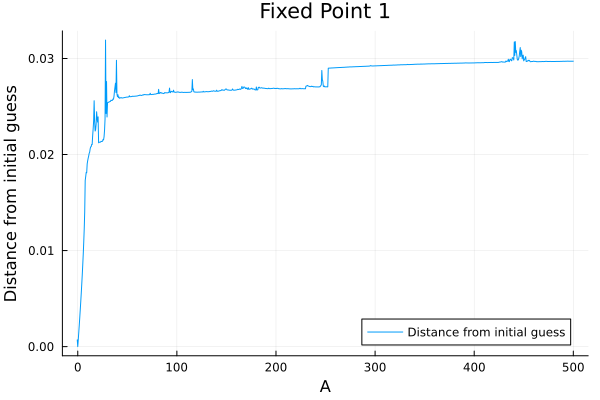

In [6]:
# plot distance from initial solution as A increases

distances = []
for (A, initial_guess, solution) in results[1]
    push!(distances, norm(solution - initial_guess))
end

plot(A_min:A_step:A_max, distances, title="Fixed Point 1", xlabel="A", ylabel="Distance from initial guess", label="Distance from initial guess")

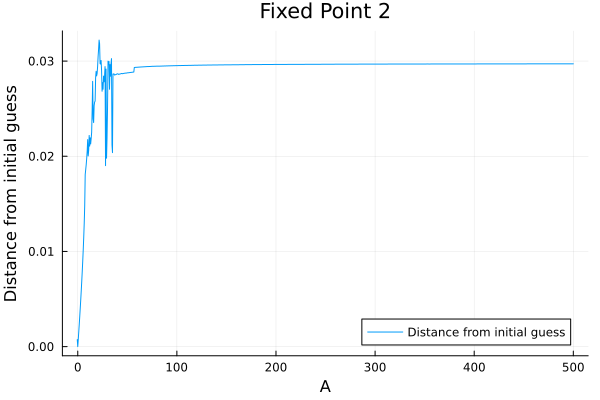

In [7]:
# plot distance from initial solution as A increases

distances = []
for (A, initial_guess, solution) in results[2]
    push!(distances, norm(solution - initial_guess))
end

plot(A_min:A_step:A_max, distances, title="Fixed Point 2", xlabel="A", ylabel="Distance from initial guess", label="Distance from initial guess")

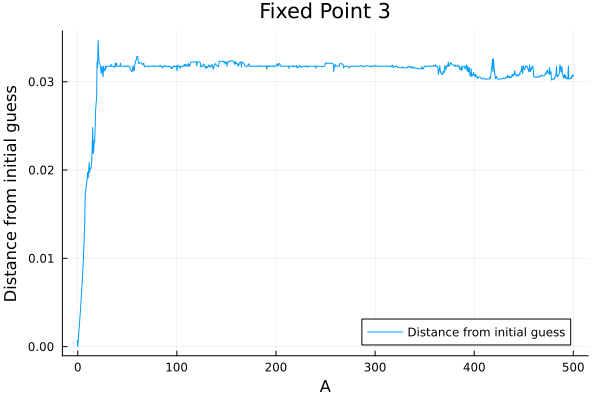

In [8]:
# plot distance from initial solution as A increases

distances = []
for (A, initial_guess, solution) in results[3]
    push!(distances, norm(solution - initial_guess))
end

plot(A_min:A_step:A_max, distances, title="Fixed Point 3", xlabel="A", ylabel="Distance from initial guess", label="Distance from initial guess")

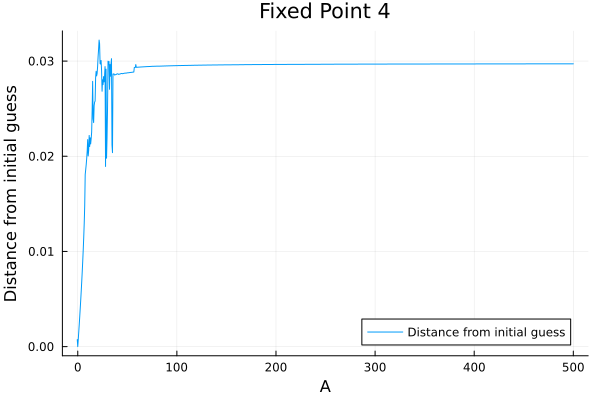

In [9]:
# plot distance from initial solution as A increases

distances = []
for (A, initial_guess, solution) in results[4]
    push!(distances, norm(solution - initial_guess))
end

plot(A_min:A_step:A_max, distances, title="Fixed Point 4", xlabel="A", ylabel="Distance from initial guess", label="Distance from initial guess")

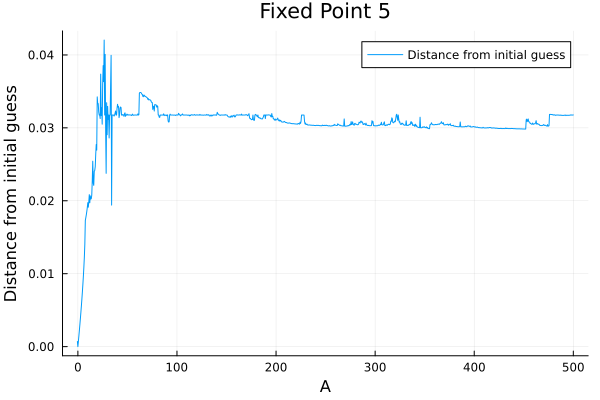

In [10]:
# plot distance from initial solution as A increases

distances = []
for (A, initial_guess, solution) in results[5]
    push!(distances, norm(solution - initial_guess))
end

plot(A_min:A_step:A_max, distances, title="Fixed Point 5", xlabel="A", ylabel="Distance from initial guess", label="Distance from initial guess")

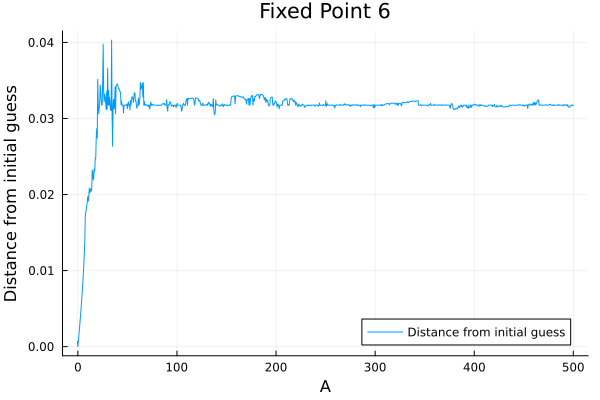

In [11]:
# plot distance from initial solution as A increases

distances = []
for (A, initial_guess, solution) in results[6]
    push!(distances, norm(solution - initial_guess))
end

plot(A_min:A_step:A_max, distances, title="Fixed Point 6", xlabel="A", ylabel="Distance from initial guess", label="Distance from initial guess")

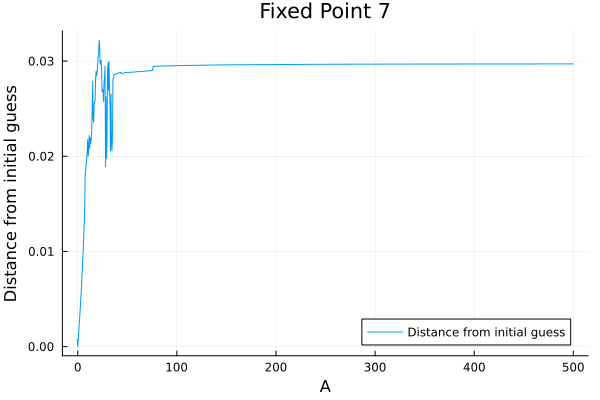

In [12]:
# plot distance from initial solution as A increases

distances = []
for (A, initial_guess, solution) in results[7]
    push!(distances, norm(solution - initial_guess))
end

plot(A_min:A_step:A_max, distances, title="Fixed Point 7", xlabel="A", ylabel="Distance from initial guess", label="Distance from initial guess")

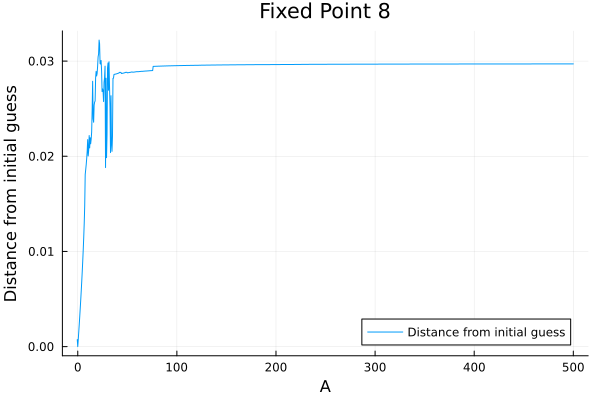

In [13]:
# plot distance from initial solution as A increases

distances = []
for (A, initial_guess, solution) in results[8]
    push!(distances, norm(solution - initial_guess))
end

plot(A_min:A_step:A_max, distances, title="Fixed Point 8", xlabel="A", ylabel="Distance from initial guess", label="Distance from initial guess")